In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Definir la función para procesar y crear nuevos datos de solicitudes de efectivo
def process_and_create_new_cash_requests(df):
    # Crear una copia del dataframe para evitar modificar el original
    df_processed = df.copy()
    # Rellenar 'user_id' con 'deleted_account_id' cuando 'user_id' es nulo
    df_processed['user_id'].fillna(df_processed['deleted_account_id'], inplace=True)
    return df_processed
# Ruta al archivo de solicitudes de efectivo
cash_requests_path = 'cleaned_dataset/modified_cash_requests_data.csv'
# Leer los datos del archivo CSV
cash_requests_data = pd.read_csv(cash_requests_path)
# Procesar y crear nuevos datos de solicitudes de efectivo
cash_requests_processed = process_and_create_new_cash_requests(cash_requests_data)
# Mostrar el nuevo DataFrame procesado
print(cash_requests_processed)

          id  amount             status                     created_at  \
0          5   100.0           rejected  2019-12-10 19:05:21.596873+00   
1         70   100.0           rejected   2019-12-10 19:50:12.34778+00   
2          7   100.0           rejected   2019-12-10 19:13:35.82546+00   
3         10    99.0           rejected  2019-12-10 19:16:10.880172+00   
4       1594   100.0           rejected  2020-05-06 09:59:38.877376+00   
...      ...     ...                ...                            ...   
23965  20616   100.0         money_back  2020-10-12 13:54:11.686225+00   
23966  25243    50.0         money_back   2020-10-27 14:41:25.73491+00   
23967  22357   100.0         money_back  2020-10-20 07:58:04.006937+00   
23968  20256   100.0         money_back  2020-10-10 05:40:55.700422+00   
23969  19886   100.0  direct_debit_sent  2020-10-08 14:16:52.155661+00   

                          updated_at  user_id               moderated_at  \
0       2019-12-11 16:47:42.40783+0

In [2]:
# Convert the "created_at" column to a datetime format
cash_requests_processed["created_at"] = pd.to_datetime(cash_requests_processed["created_at"])

# Group the data by the "id" column within the "created_at" column using a groupby.
# We look for the minimum value of each group and convert the dates to a monthly period object.
# This helps to determine when each user made their first transfer request.
first_transaction_month = cash_requests_processed.groupby("user_id")["created_at"].transform("min").dt.to_period("M")

# Create a new column reflecting the monthly cohorts.
cash_requests_processed["cohort_month"] = first_transaction_month

# Print the first 5 rows to see the monthly cohorts.
cash_requests_processed.head()

/var/folders/8d/_dfy3v191xq4fpx56kpljr380000gn/T/ipykernel_8129/1252067300.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  first_transaction_month = cash_requests_processed.groupby("user_id")["created_at"].transform("min").dt.to_period("M")


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort_month
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,rejected_transaction,NaN,2020-01-09 19:05:21.596363+00,rejected_regular,rejected_transaction,regular,NaN,NaN,NaN,NaN,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,rejected_transaction,NaN,2020-01-09 19:50:12.34778+00,rejected_regular,rejected_transaction,regular,NaN,NaN,NaN,NaN,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,rejected_transaction,NaN,2020-01-09 19:13:35.825041+00,rejected_regular,rejected_transaction,regular,NaN,NaN,NaN,NaN,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,rejected_transaction,NaN,2020-01-09 19:16:10.879606+00,rejected_regular,rejected_transaction,regular,NaN,NaN,NaN,NaN,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,rejected_transaction,NaN,2020-06-05 22:00:00+00,rejected_regular,rejected_transaction,regular,NaN,NaN,NaN,NaN,2020-05


In [3]:

# Group the data by the "id" column within the "created_at" column using a groupby.
# We look for the maximum value of each group and convert the dates to a monthly period object.
# This helps to determine when each user made their last transfer request.
last_transaction_month = cash_requests_processed.groupby("user_id")["created_at"].transform("max").dt.to_period("M")

# Create a new column reflecting the monthly cohorts.
cash_requests_processed["last_activity_month"] = last_transaction_month

# Print the first 5 rows to see the monthly cohorts.
cash_requests_processed.head()

/var/folders/8d/_dfy3v191xq4fpx56kpljr380000gn/T/ipykernel_8129/1922094939.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  last_transaction_month = cash_requests_processed.groupby("user_id")["created_at"].transform("max").dt.to_period("M")


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort_month,last_activity_month
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,rejected_transaction,NaN,2020-01-09 19:05:21.596363+00,rejected_regular,rejected_transaction,regular,NaN,NaN,NaN,NaN,2019-12,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,rejected_transaction,NaN,2020-01-09 19:50:12.34778+00,rejected_regular,rejected_transaction,regular,NaN,NaN,NaN,NaN,2019-12,2020-10
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,rejected_transaction,NaN,2020-01-09 19:13:35.825041+00,rejected_regular,rejected_transaction,regular,NaN,NaN,NaN,NaN,2019-12,2020-02
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,rejected_transaction,NaN,2020-01-09 19:16:10.879606+00,rejected_regular,rejected_transaction,regular,NaN,NaN,NaN,NaN,2019-12,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,rejected_transaction,NaN,2020-06-05 22:00:00+00,rejected_regular,rejected_transaction,regular,NaN,NaN,NaN,NaN,2020-05,2020-05


In [4]:
activity_month=cash_requests_processed["created_at"].dt.to_period("M")
cash_requests_processed["activity_month"]= activity_month
cash_requests_processed

/var/folders/8d/_dfy3v191xq4fpx56kpljr380000gn/T/ipykernel_8129/1247977105.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  activity_month=cash_requests_processed["created_at"].dt.to_period("M")


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort_month,last_activity_month,activity_month
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,rejected_transaction,NaN,2020-01-09 19:05:21.596363+00,rejected_regular,rejected_transaction,regular,NaN,NaN,NaN,NaN,2019-12,2019-12,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,rejected_transaction,NaN,2020-01-09 19:50:12.34778+00,rejected_regular,rejected_transaction,regular,NaN,NaN,NaN,NaN,2019-12,2020-10,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,rejected_transaction,NaN,2020-01-09 19:13:35.825041+00,rejected_regular,rejected_transaction,regular,NaN,NaN,NaN,NaN,2019-12,2020-02,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,rejected_transaction,NaN,2020-01-09 19:16:10.879606+00,rejected_regular,rejected_transaction,regular,NaN,NaN,NaN,NaN,2019-12,2019-12,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,rejected_transaction,NaN,2020-06-05 22:00:00+00,rejected_regular,rejected_transaction,regular,NaN,NaN,NaN,NaN,2020-05,2020-05,2020-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00,13681.0,money_back_instant,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN,2020-06,2020-10,2020-10
23966,25243,50.0,money_back,2020-10-27 14:41:25.734910+00:00,2020-12-18 13:15:40.843946+00,30367.0,money_back_instant,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00,2020-10,2020-10,2020-10
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00,82122.0,money_back_instant,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN,2020-10,2020-10,2020-10
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00,64517.0,money_back_instant,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN,2020-10,2020-10,2020-10


In [5]:
#Sum the number of customers CR for each cohort
cohort_size_monthly = cash_requests_processed.groupby(["cohort_month", "activity_month"]).agg(Num_clientes=('user_id', 'nunique')).reset_index()
cohort_size_monthly


,cohort_month,activity_month,Num_clientes
0,2019-11,2019-11,1
1,2019-11,2019-12,1
2,2019-11,2020-04,1
3,2019-11,2020-05,1
4,2019-11,2020-08,1
...,...,...,...
78,2020-09,2020-10,680
79,2020-09,2020-11,20
80,2020-10,2020-10,4802
81,2020-10,2020-11,15


In [6]:
cohort_size_initial= cohort_size_monthly.groupby('cohort_month').first()
cohort_size_initial

,activity_month,Num_clientes
cohort_month,,
2019-11,2019-11,1
2019-12,2019-12,254
2020-01,2020-01,106
2020-02,2020-02,90
2020-03,2020-03,86
2020-04,2020-04,246
2020-05,2020-05,432
2020-06,2020-06,1540
2020-07,2020-07,1482


In [7]:
#final del periodo - #clientes adquiridos / #inicio del periodo *100 
cohort_size_initial= cohort_size_monthly.groupby('cohort_month').first()
retention= cohort_size_monthly.pivot(index="cohort_month", columns= "activity_month",values= "Num_clientes").div(cohort_size_initial["Num_clientes"],axis=0)
retention

activity_month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohort_month,,,,,,,,,,,,,
2019-11,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
2019-12,NaN,1.0,0.354331,0.228346,0.267717,0.263780,0.295276,0.287402,0.232283,0.263780,0.169291,0.244094,0.003937
2020-01,NaN,NaN,1.000000,0.207547,0.150943,0.254717,0.254717,0.254717,0.264151,0.198113,0.188679,0.226415,0.009434
2020-02,NaN,NaN,NaN,1.000000,0.500000,0.466667,0.466667,0.433333,0.433333,0.400000,0.277778,0.377778,NaN
2020-03,NaN,NaN,NaN,NaN,1.000000,0.441860,0.430233,0.523256,0.418605,0.395349,0.337209,0.313953,0.011628
2020-04,NaN,NaN,NaN,NaN,NaN,1.000000,0.471545,0.495935,0.373984,0.325203,0.308943,0.247967,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.590278,0.506944,0.430556,0.340278,0.356481,0.009259
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.490909,0.482468,0.372727,0.367532,0.003247
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.474359,0.344804,0.359649,0.004723


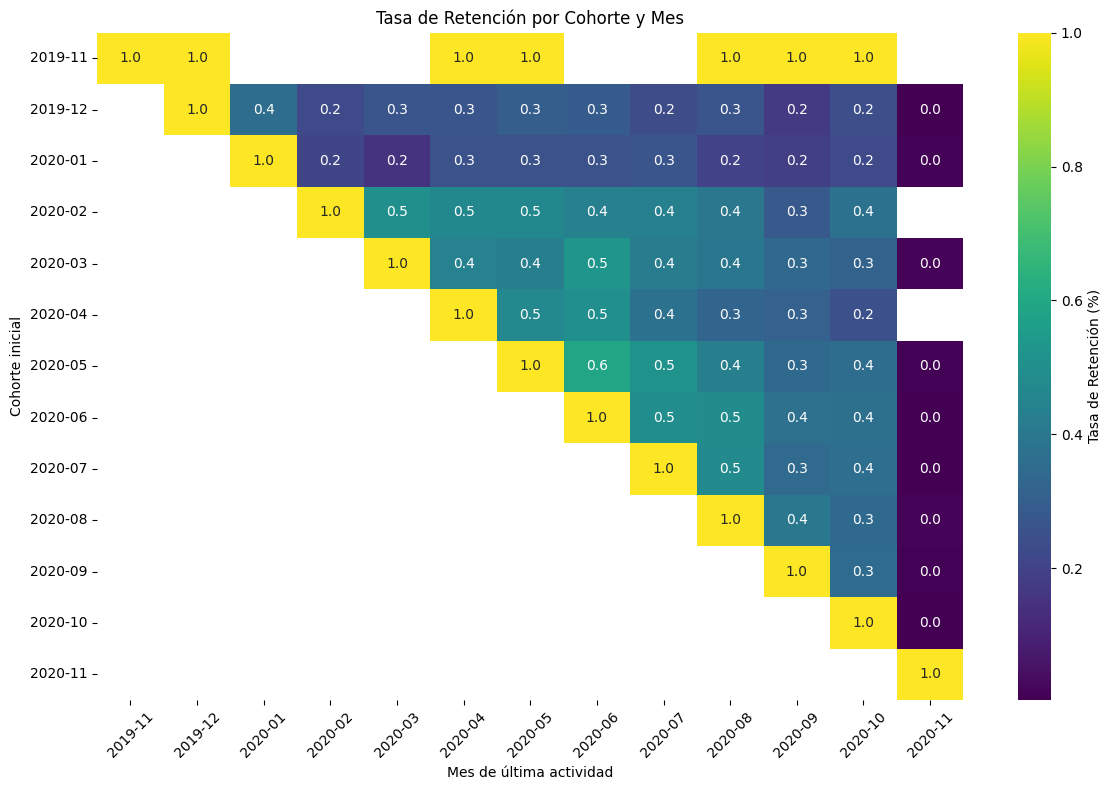

In [8]:
#retention = cohort_size_monthly.pivot(index='cohort_month', columns='last_activity_month', values='retention_rate')
# Ordenar las filas por cohorte en orden ascendente
#pivot_retention = pivot_retention.sort_index()

plt.figure(figsize=(12, 8))
sns.heatmap(retention, cmap='viridis', annot=True, fmt=".1f", cbar_kws={'label': 'Tasa de Retención (%)'})
plt.title('Tasa de Retención por Cohorte y Mes')
plt.xlabel('Mes de última actividad')
plt.ylabel('Cohorte inicial')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()